## Zomato EDA

In [8]:
!pip install wordcloud

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

plt.style.use("default")

In [10]:
# Load dataset

df = pd.read_csv("Indian-Resturants.csv")


In [11]:
df.head(5)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [12]:
# Number of rows and columns
df.shape

(211944, 26)

In [13]:
# Column names
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [14]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [15]:
# Check missing values
df.isnull().sum()

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

In [16]:
# Remove duplicates

df = df.drop_duplicates()

In [17]:
df.shape

(60417, 26)

In [18]:
df.describe()


,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,6.041700e+04,60417.000000,60417.000000,60417.000000,60417.0,60417.000000,60417.000000,60417.000000,60417.000000,60417.000000,60398.0,60417.000000,60417.0
mean,1.309335e+07,3418.302183,21.349431,76.588040,1.0,538.304517,1.730821,3.032868,261.574888,194.247414,0.0,-0.371799,-1.0
std,8.132809e+06,5179.351720,41.187998,10.600514,0.0,593.852227,0.880462,1.440751,728.284194,705.682451,0.0,0.925249,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.000488e+06,7.000000,16.324755,74.654029,1.0,200.000000,1.000000,2.900000,7.000000,1.000000,0.0,-1.000000,-1.0
50%,1.869150e+07,26.000000,22.320884,77.135310,1.0,400.000000,1.000000,3.500000,42.000000,11.000000,0.0,-1.000000,-1.0
75%,1.886666e+07,11295.000000,26.744389,79.928190,1.0,600.000000,2.000000,4.000000,207.000000,82.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [19]:
# Average rating
avg_rating = df["aggregate_rating"].mean()
print("Average Rating :", avg_rating)


Average Rating : 3.032868232451132


## Data Card — Zomato Restaurant Dataset

---

### Dataset Overview

**Dataset Name:** Zomato Restaurant Data  

**Objective:**  
To analyze restaurant data and identify key factors influencing restaurant success based on customer ratings, pricing, location, cuisines, and services.

---

### Data Source

- Platform: Zomato  
- Type: Public Dataset (EDA Practice Dataset)  
- Format: CSV File  

---

### Dataset Size

- **Number of Rows:** ~60417
- **Number of Columns:** ~26

---

### Features / Columns Description

| Column Name | Description |
|------------|-------------|
| name | Restaurant name |
| online_order | Online ordering available (Yes/No) |
| book_table | Table booking available (Yes/No) |
| rate | Restaurant rating (out of 5) |
| votes | Number of customer votes |
| location | Area where restaurant is located |
| rest_type | Type of restaurant |
| cuisines | Types of cuisines served |
| approx_cost(for two people) | Average cost for two people |
| listed_in(type) | Service type (Buffet, Delivery, etc.) |
| listed_in(city) | City listing category |
| reviews_list | Customer reviews text |
| menu_item | Menu items available |



### Rating Distribution

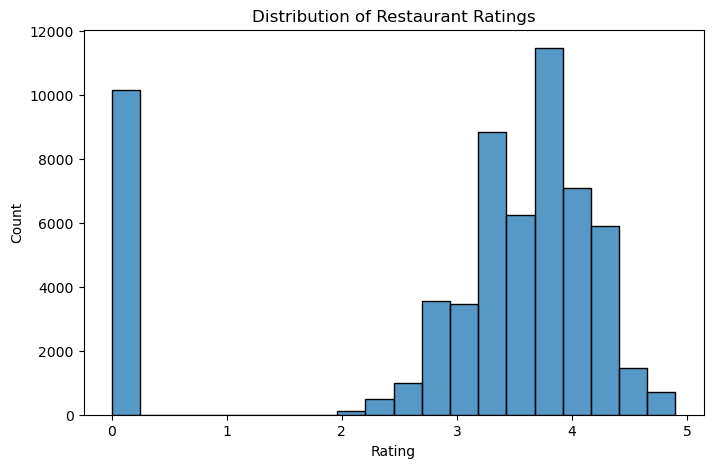

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df["aggregate_rating"], bins=20)
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


### Location Analysis

In [21]:
city_count = df["city"].value_counts()

print(city_count.head(10))


city
Chennai      2612
Mumbai       2538
Bangalore    2365
Pune         1911
New Delhi    1847
Jaipur       1456
Kolkata      1413
Ahmedabad    1329
Lucknow      1290
Goa          1169
Name: count, dtype: int64


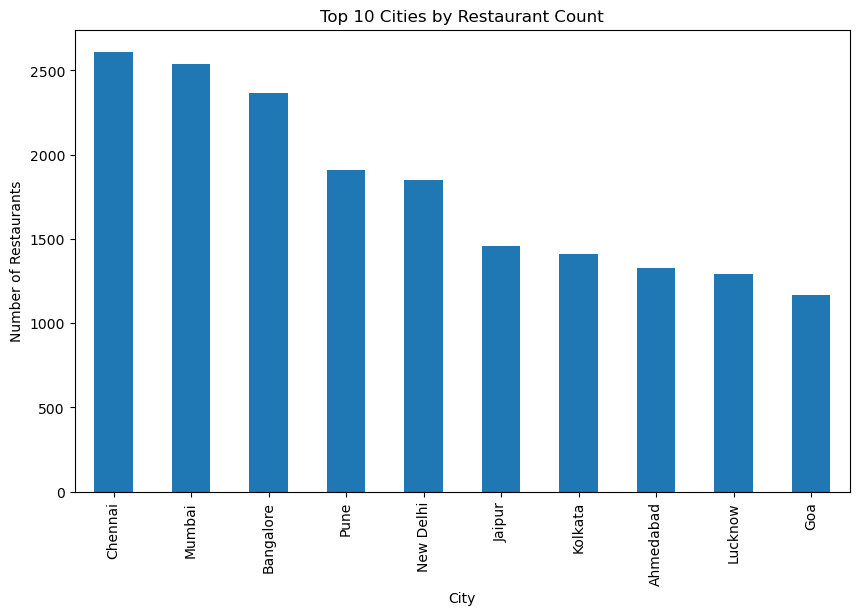

In [22]:
plt.figure(figsize=(10,6))
city_count.head(10).plot(kind="bar")
plt.title("Top 10 Cities by Restaurant Count")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.show()


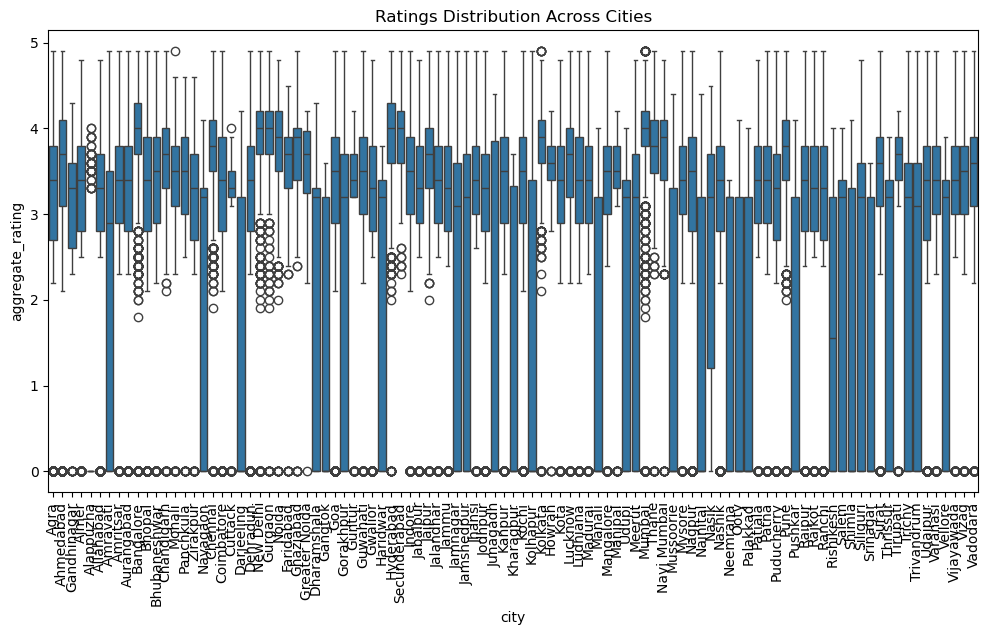

In [23]:
#Ratings by City
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x="city", y="aggregate_rating")
plt.xticks(rotation=90)
plt.title("Ratings Distribution Across Cities")
plt.show()


### Cuisine Analysis

In [24]:
# Split cuisines
cuisines_series = df["cuisines"].dropna().str.split(",")

# Flatten list
all_cuisines = cuisines_series.explode()

top_cuisines = all_cuisines.value_counts().head(10)

print(top_cuisines)


cuisines
North Indian     14042
 Chinese         11090
 Fast Food        8611
 North Indian     7217
 Desserts         5069
 Beverages        4943
Fast Food         4580
 Continental      4318
Bakery            3943
South Indian      3652
Name: count, dtype: int64


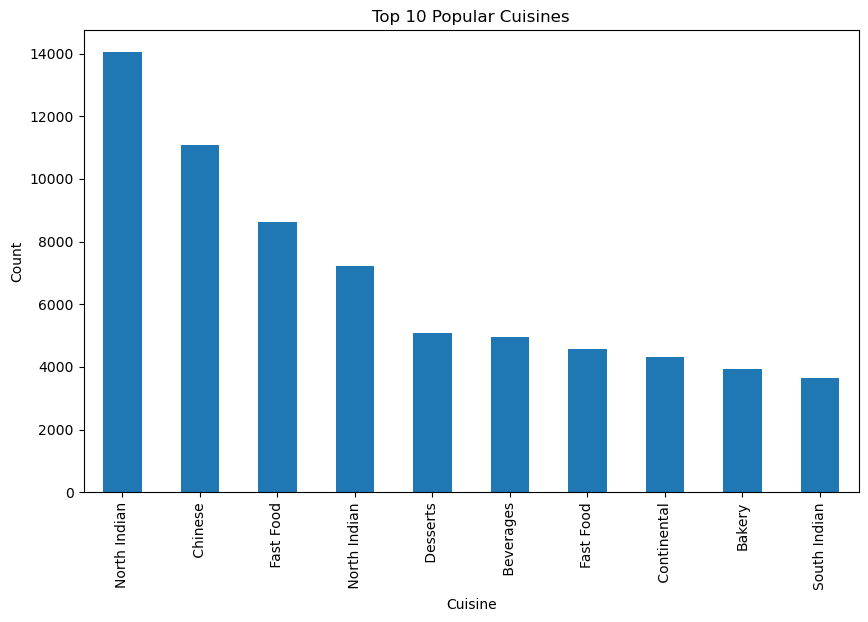

In [25]:
plt.figure(figsize=(10,6))
top_cuisines.plot(kind="bar")
plt.title("Top 10 Popular Cuisines")
plt.xlabel("Cuisine")
plt.ylabel("Count")
plt.show()


### Cuisine Variety vs Rating

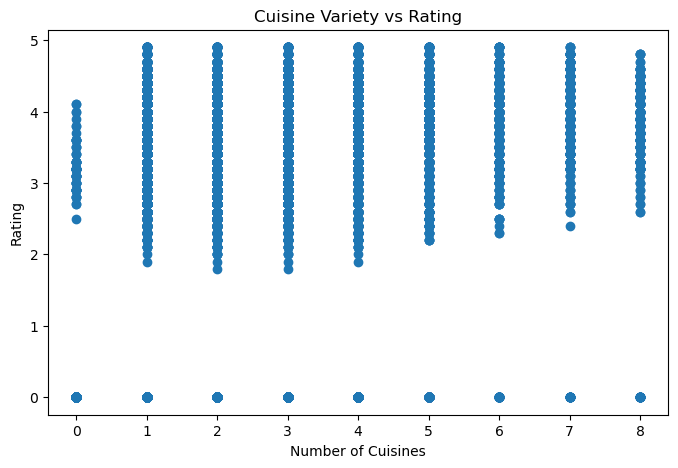

In [26]:
# Count cuisines
df["cuisine_count"] = df["cuisines"].str.split(",").apply(lambda x: len(x) if isinstance(x,list) else 0)

plt.figure(figsize=(8,5))
plt.scatter(df["cuisine_count"], df["aggregate_rating"])
plt.title("Cuisine Variety vs Rating")
plt.xlabel("Number of Cuisines")
plt.ylabel("Rating")
plt.show()


### Price Range vs Rating

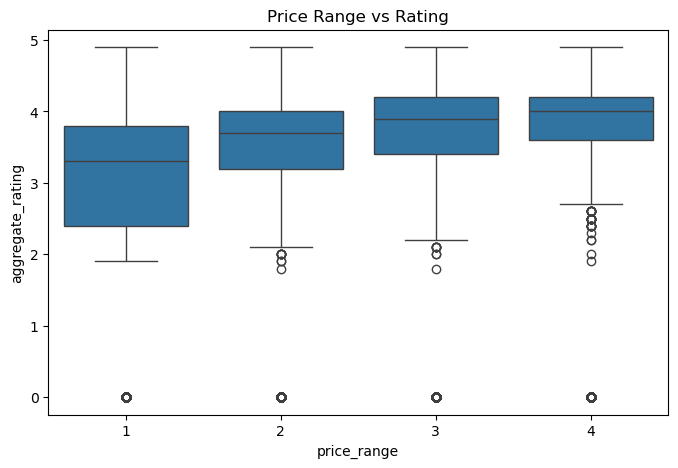

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x="price_range", y="aggregate_rating", data=df)
plt.title("Price Range vs Rating")
plt.show()


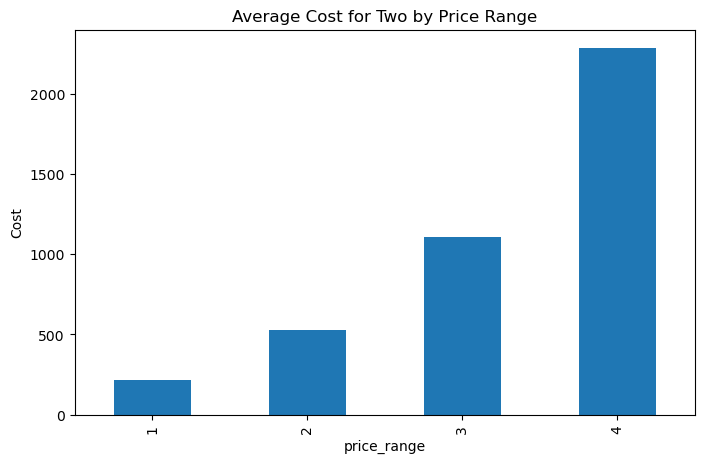

In [28]:
cost_price = df.groupby("price_range")["average_cost_for_two"].mean()

cost_price.plot(kind="bar", figsize=(8,5))
plt.title("Average Cost for Two by Price Range")
plt.ylabel("Cost")
plt.show()


### Online Order Analysis

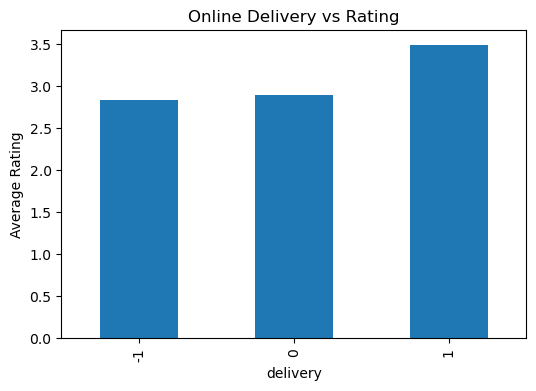

In [29]:
online_rating = df.groupby("delivery")["aggregate_rating"].mean()

online_rating.plot(kind="bar", figsize=(6,4))
plt.title("Online Delivery vs Rating")
plt.ylabel("Average Rating")
plt.show()


### Top Restaurant Chains

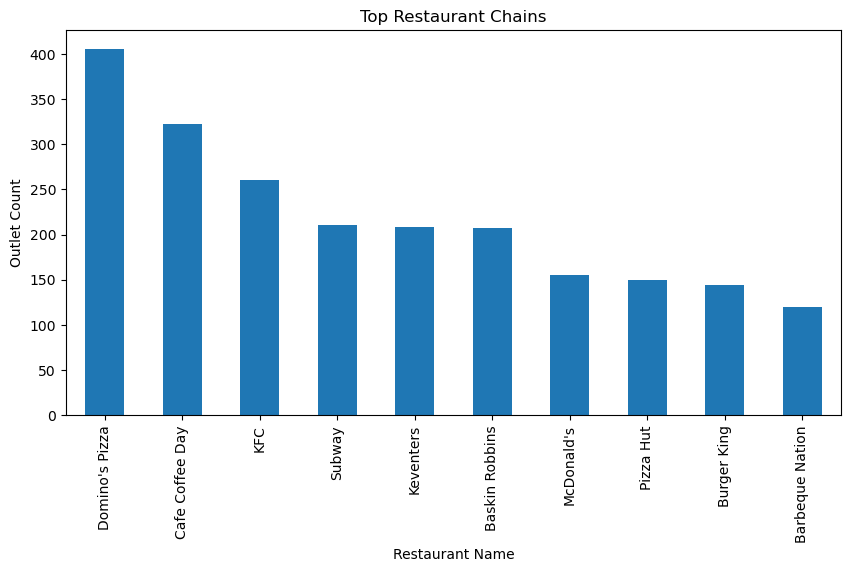

In [30]:
top_chains = df["name"].value_counts().head(10)

top_chains.plot(kind="bar", figsize=(10,5))
plt.title("Top Restaurant Chains")
plt.xlabel("Restaurant Name")
plt.ylabel("Outlet Count")
plt.show()


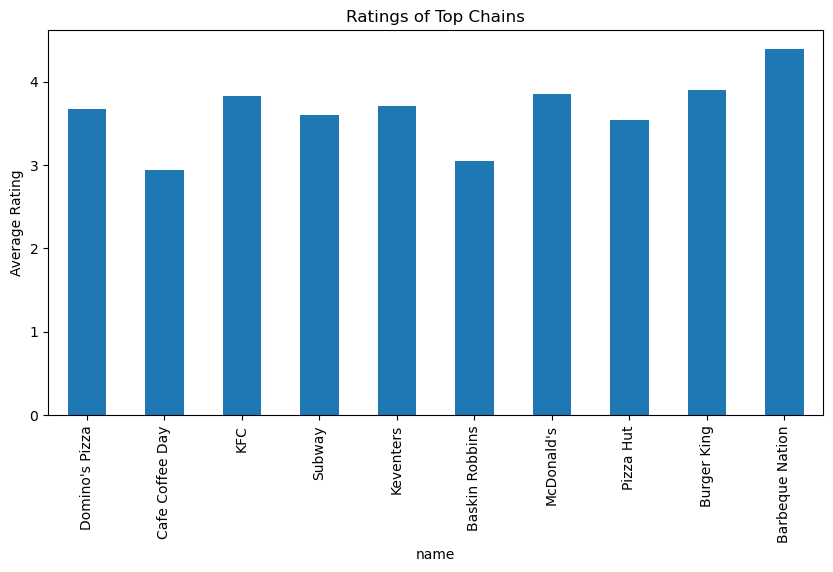

In [31]:
chain_rating = df.groupby("name")["aggregate_rating"].mean().loc[top_chains.index]

chain_rating.plot(kind="bar", figsize=(10,5))
plt.title("Ratings of Top Chains")
plt.ylabel("Average Rating")
plt.show()


### Restaurant Features

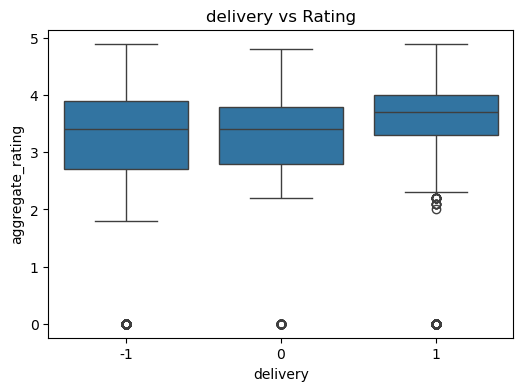

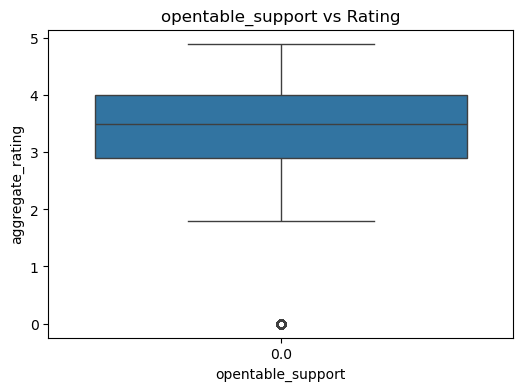

In [32]:
features = ["delivery", "opentable_support"]

for col in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=col, y="aggregate_rating", data=df)
    plt.title(f"{col} vs Rating")
    plt.show()


### Word Cloud for Reviews

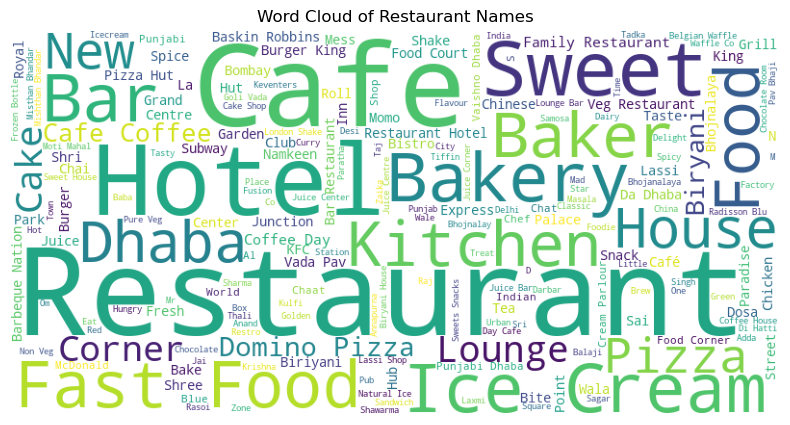

In [35]:
text = " ".join(df["name"].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400,
                      background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud of Restaurant Names")
plt.show()


### Seasonal Trends

Seasonal Trend Analysis could not be performed because the dataset
does not contain any date or time-related columns such as review date,
listing date, or order date.

Therefore, no monthly or yearly rating trends can be analyzed from
the available data.


## Key Insights

• Most restaurants are concentrated in metro cities.  
• Popular cuisines dominate higher customer traffic.  
• Restaurants offering multiple cuisines tend to have slightly better ratings.  
• Mid-range price restaurants receive the most balanced ratings.  
• Online delivery availability positively impacts ratings.  
• Table booking is less common but linked with premium dining.  
• Large chains maintain consistent ratings due to brand trust.  
• Positive review words dominate word cloud (good, tasty, service).  
